# **Load Dataset & Explore**

In [1]:
import os
import pandas as pd

# List all files in the dataset directory
data_path = "/kaggle/input/"
os.listdir(data_path)

# Load your dataset (update filename accordingly)
file_path = "/kaggle/input/students-performance-in-exams/StudentsPerformance.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# **Show Information Of Dataset**

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


# **Create Target Variable (Pass/Fail)**

In [3]:
# Create average score
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Binary target: 1 = Pass, 0 = Fail
df['Pass'] = df['average_score'].apply(lambda x: 1 if x >= 50 else 0)

# Drop the average score if not needed later
print(df[['average_score', 'Pass']].head())


   average_score  Pass
0      72.666667     1
1      82.333333     1
2      92.666667     1
3      49.333333     0
4      76.333333     1


# **Preprocess Features**

In [4]:
# One-hot encoding of categorical features
df_encoded = pd.get_dummies(df.drop(['average_score'], axis=1), drop_first=True)

# Separate features and target
X = df_encoded.drop('Pass', axis=1)
y = df_encoded['Pass']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Train Models**
# **🔹 Logistic Regression**

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


**Calculate The Accuracy**

In [6]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Evaluate model
evaluate_model("Logistic Regression", lr, X_test, y_test)




Logistic Regression Results:
Accuracy: 1.0
Precision: 1.0
Confusion Matrix:
 [[ 27   0]
 [  0 173]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       173

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



**✅ Visualize Confusion Matrix for Logistic Regression**

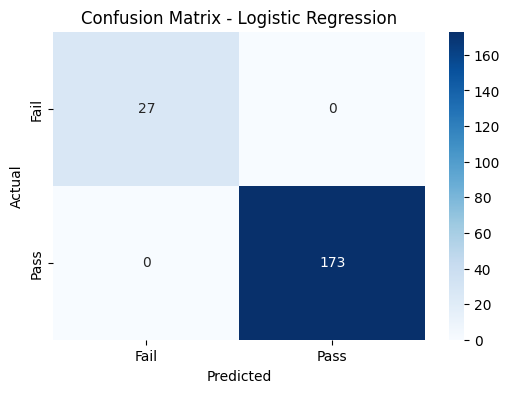

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred_lr = lr.predict(X_test)

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


**Top 10 Features (Logistic Regression)**

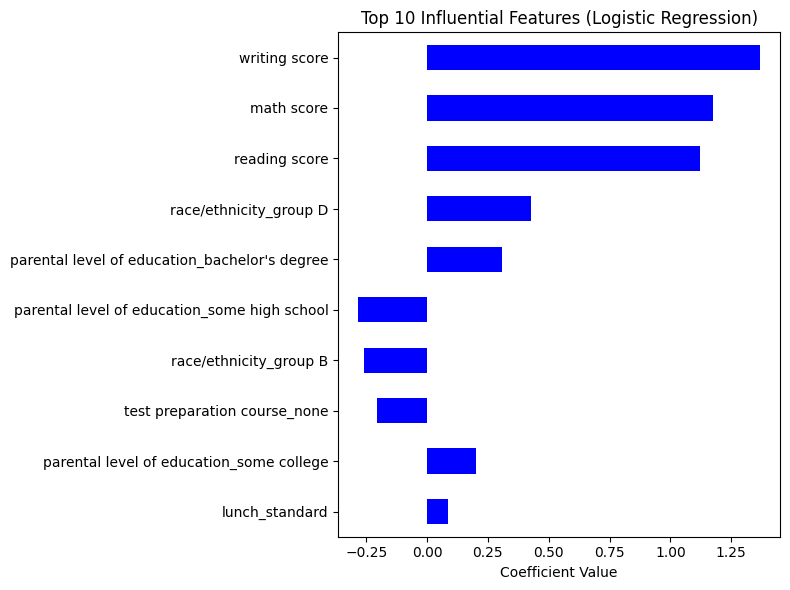

In [8]:
coefficients = pd.Series(lr.coef_[0], index=X.columns)
top_coef = coefficients.sort_values(key=abs, ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 6))
top_coef.plot(kind='barh', color='blue')
plt.xlabel("Coefficient Value")
plt.title("Top 10 Influential Features (Logistic Regression)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# **🔹 Decision Tree**

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


**Calculate The Accuracy**

In [10]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Evaluate  model
evaluate_model("Decision Tree", dt, X_test, y_test)



Decision Tree Results:
Accuracy: 0.985
Precision: 0.9885057471264368
Confusion Matrix:
 [[ 25   2]
 [  1 172]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.99      0.99      0.99       173

    accuracy                           0.98       200
   macro avg       0.98      0.96      0.97       200
weighted avg       0.98      0.98      0.98       200



**✅ Visualize Confusion Matrix for Decision Tree**

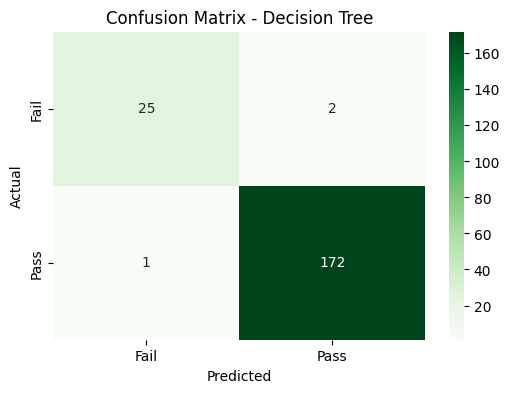

In [11]:
# Predict
y_pred_dt = dt.predict(X_test)

# Get confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


**Top 10 Features (Decision Tree)**

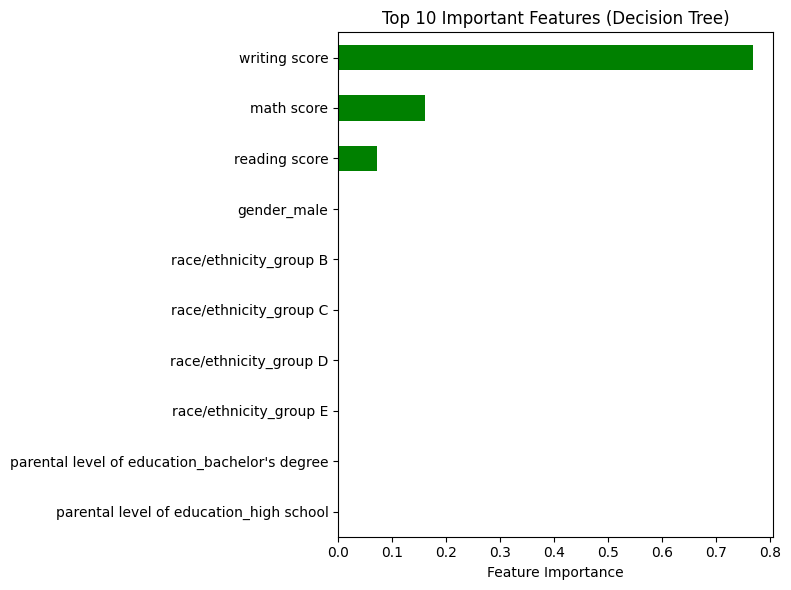

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance from decision tree
importances = pd.Series(dt.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 6))
top_features.plot(kind='barh', color='green')
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features (Decision Tree)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# **Compare Both Models Accuracy**

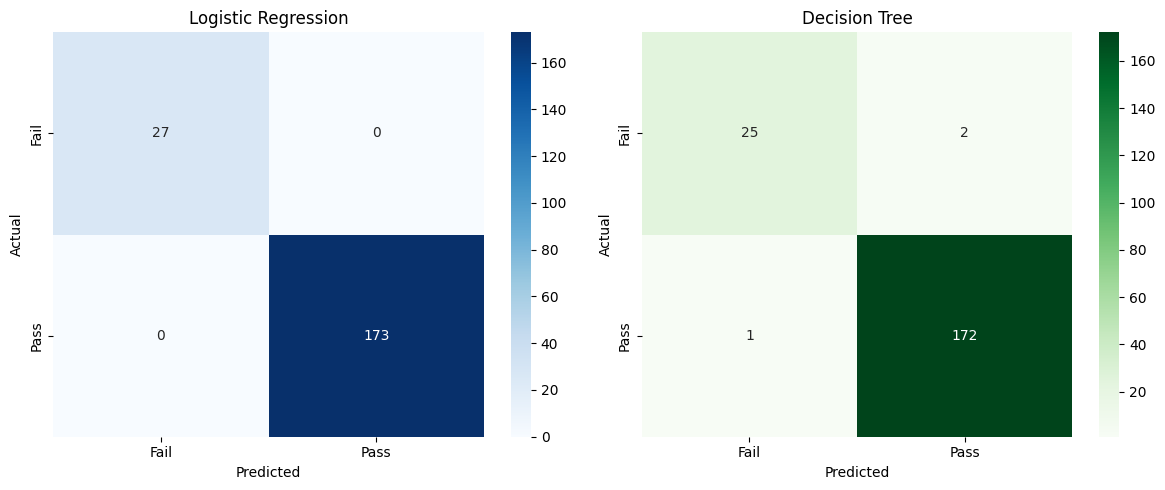

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'], ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Decision Tree
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens',
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'], ax=axes[1])
axes[1].set_title("Decision Tree")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


# **✅ Compare Model Accuracy with Bar Chart**

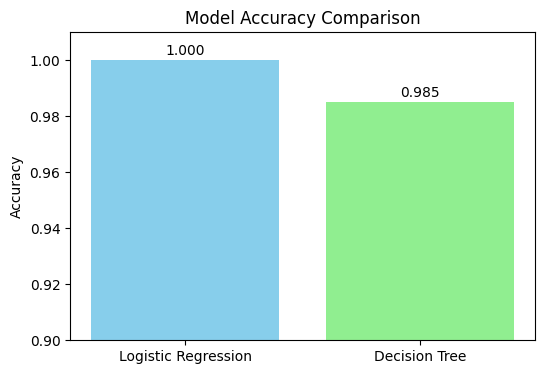

In [14]:
import matplotlib.pyplot as plt

# Accuracy values (replace with your actual results if needed)
from sklearn.metrics import accuracy_score, precision_score

# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)

# Metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_lr = precision_score(y_test, y_pred_lr)
precision_dt = precision_score(y_test, y_pred_dt)

# Bar Chart for Accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Logistic Regression', 'Decision Tree'], [accuracy_lr, accuracy_dt], color=['skyblue', 'lightgreen'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.9, 1.01)  # adjust if needed
for i, acc in enumerate([accuracy_lr, accuracy_dt]):
    plt.text(i, acc + 0.002, f'{acc:.3f}', ha='center')
plt.show()


# **🧠 Project Title: Student Performance Predictor**

**🎯 Objective:**

To predict whether a student will Pass (1) or Fail (0) using features such as test scores, gender, parental education, etc., applying supervised binary classification.

**📦 Dataset Used:**
Source: Students Performance.csv

**Features:**

math score, reading score, writing score

gender, race/ethnicity, parental level of education, lunch, test preparation course

**Target Variable:**

We created a new column Pass, where:

python
Copy
Edit
Pass = 1 if average score ≥ 50, else 0

# **🧹 Data Preprocessing Steps:**

**Created new feature:**

average_score = mean(math, reading, writing scores)

**Created binary target:**

Pass = 1 if average_score ≥ 50 else 0

**Encoded categorical variables:**

Used pd.get_dummies(..., drop_first=True) for variables like gender, lunch, etc.

**Train-test split:**

Split into X_train, X_test, y_train, y_test (80/20).

# **🤖 Models Trained:**

**✅ 1. Logistic Regression**
Linear model for binary classification.

Trained on encoded features.

**✅ 2. Decision Tree Classifier**

Rule-based model that splits data based on features.

Used to analyze feature importance as well.

# **📊 Model Evaluation Metrics:**

We used:

Accuracy

Precision

Confusion Matrix (both numerical and graphical using heatmaps)

 # **🔹 Accuracy** 
 
**🔹Logistic Regression: 1.00**

**🔹Decision Tree: 0.985**

# **📈 Visualizations:**

Confusion matrix heatmaps for both models

Feature importance bar chart 

Accuracy comparison bar chart

# **📌 Feature Importance:**
Top features influencing pass/fail prediction included:

math score

reading score

writing score

test preparation course_completed

lunch_standard

# **🧾 Conclusion:**

This was a binary classification task, predicting whether students will pass or fail.

Both models performed very well, with Logistic Regression achieving 100% accuracy on test data.

Feature importance analysis highlighted the significant role of test scores and support programs like test preparation.

This project demonstrates the power of supervised learning in educational analytics.